In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import glob
import dlib
import imutils

In [2]:
data_dir = (r'C:\Users\armej\Desktop\PID\images\data')
data_dir

'C:\\Users\\armej\\Desktop\\PID\\images\\data'

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/armej/Desktop/PID/images/data')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('C:/Users/armej/Desktop/PID/images/data/angry/persona_enojada1.jpg'),
 WindowsPath('C:/Users/armej/Desktop/PID/images/data/angry/persona_enojada2.jpg'),
 WindowsPath('C:/Users/armej/Desktop/PID/images/data/angry/persona_enojada3.jpg'),
 WindowsPath('C:/Users/armej/Desktop/PID/images/data/happy/persona_feliz.jpg'),
 WindowsPath('C:/Users/armej/Desktop/PID/images/data/sad/persona_triste1.jpg')]

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

9


In [6]:
Angry = list(data_dir.glob('angry/*'))
Angry[:5]
Happy = list(data_dir.glob('happy/*'))
Happy[:5]
Surprise = list(data_dir.glob('surprise/*'))
Surprise[:5]



[WindowsPath('C:/Users/armej/Desktop/PID/images/data/surprise/persona_asustada1.jpg'),
 WindowsPath('C:/Users/armej/Desktop/PID/images/data/surprise/persona_asustada2.jpg'),
 WindowsPath('C:/Users/armej/Desktop/PID/images/data/surprise/persona_asustada3.jpg'),
 WindowsPath('C:/Users/armej/Desktop/PID/images/data/surprise/persona_asustada4.jpg')]

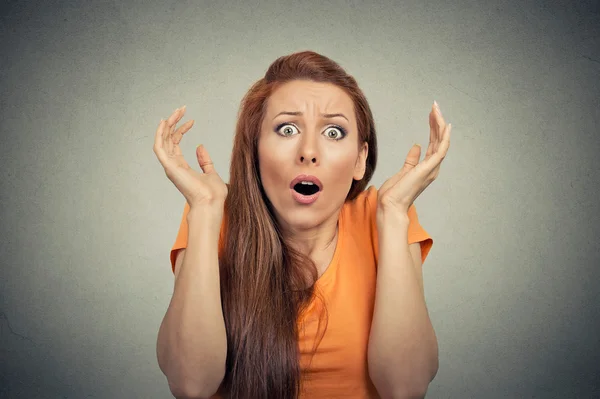

In [7]:

PIL.Image.open(str(Angry[1]))
PIL.Image.open(str(Surprise[1]))
#PIL.Image.open(str(Happy[1]))

In [8]:
emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

emotion_dict = {
    'Angry': list(data_dir.glob('Angry/*')),
    'Disgust': list(data_dir.glob('Disgust/*')),
    'Fear': list(data_dir.glob('Fear/*')),
    'Happy': list(data_dir.glob('Happy/*')),
    'Neutral': list(data_dir.glob('Neutral/*')),
    'Sad': list(data_dir.glob('Sad/*')),
    'Surprise': list(data_dir.glob('Surprise/*')),
}

In [9]:
emotion_labels = {
    'Angry': 0,
    'Disgust': 1,
    'Fear': 2,
    'Happy': 3,
    'Neutral': 4,
    'Sad': 5,
    'Surprise': 6,

}

In [10]:
emotion_dict['Angry']
str(emotion_dict['Angry'][0])

'C:\\Users\\armej\\Desktop\\PID\\images\\data\\Angry\\persona_enojada1.jpg'

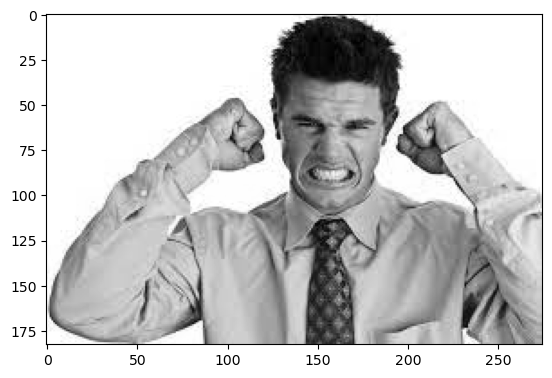

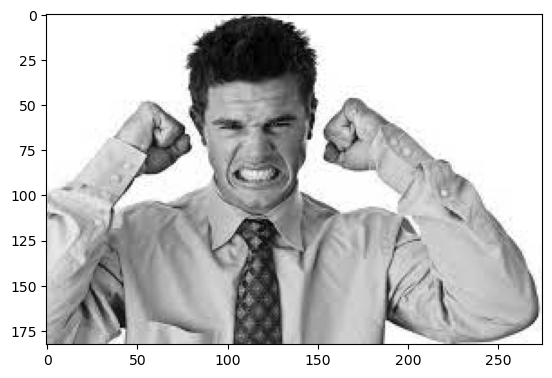

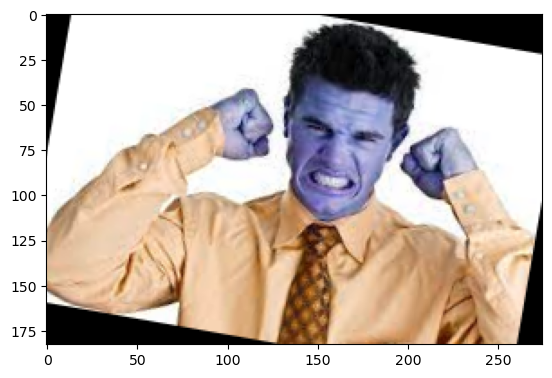

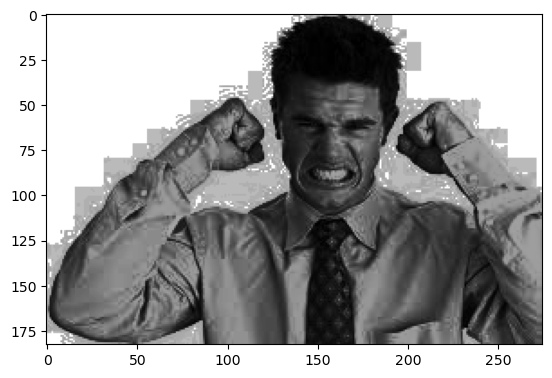

In [11]:
img = cv2.imread(str(emotion_dict['Angry'][2]))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
flip1 = cv2.flip(gray,1)

rows = img.shape[0]
cols = img.shape[1]
img_center = (cols / 2, rows / 2)
M = cv2.getRotationMatrix2D(img_center, -10, 1)
rotated_image = cv2.warpAffine(img, M, (cols, rows))

#img = cv2.imread('wiki.jpg',0)
equ = cv2.equalizeHist(gray)
#res = np.hstack((img,equ))


plt.imshow(gray,cmap='gray')
plt.show()
plt.imshow(flip1,cmap='gray')
plt.show()
plt.imshow(rotated_image,cmap='gray')
plt.show()
plt.imshow(equ,cmap='gray')
plt.show()


(180, 180)


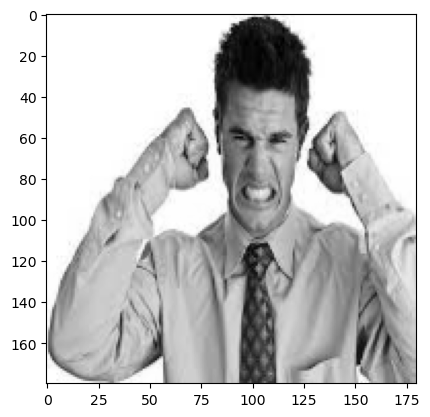

In [12]:
gray = cv2.resize(gray,(180,180))
print(gray.shape)
plt.imshow(gray,cmap='gray')

In [13]:
Angry = (r'C:\Users\armej\Desktop\PID\images\data_aug\angry')
Disgust = (r'C:\Users\armej\Desktop\PID\images\data_aug\disgust')
Fear = (r'C:\Users\armej\Desktop\PID\images\data_aug\fear')
Happy = (r'C:\Users\armej\Desktop\PID\images\data_aug\happy')
Neutral = (r'C:\Users\armej\Desktop\PID\images\data_aug\neutral')
Sad = (r'C:\Users\armej\Desktop\PID\images\data_aug\sad')
Surprise = (r'C:\Users\armej\Desktop\PID\images\data_aug\surprise')


motion_dict = [Angry,Disgust,Fear,Happy,Neutral,Sad,Surprise]
X, y = [], []    
i = -1
for emotion_name, images in emotion_dict.items():
    i = i +1 
    j = -1
    for image in images:
        j = j + 1    
        #image load
        img = cv2.imread(str(image))
        #convert to gray
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #reshape the image
        resized_img = cv2.resize(gray,(240,240))
        #flip  the image 
        flip = cv2.flip(resized_img,1)
        #name of the image to save
        name = 'people_' + str(emotion_name) + '_'+str(j)+'.jpg'
        #save of the image    
        cv2.imwrite(os.path.join(motion_dict[i],name),resized_img)
        # increment of j to no delete other image
        j = j + 1        
        name = 'people_' + str(emotion_name) + '_'+str(j)+'.jpg'
        cv2.imwrite(os.path.join(motion_dict[i],name),flip)
        # Rotacion de la imagen +10
        rows = resized_img.shape[0]
        cols = resized_img.shape[1]
        img_center = (cols / 2, rows / 2)
        M = cv2.getRotationMatrix2D(img_center, 10, 1)
        rotated_image = cv2.warpAffine(resized_img, M, (cols, rows))
        j = j + 1   
        name = 'people_' + str(emotion_name) + '_'+str(j)+'.jpg'
        cv2.imwrite(os.path.join(motion_dict[i],name),rotated_image)
        # Rotacion de la imagen -10
        M = cv2.getRotationMatrix2D(img_center, -10, 1)
        rotated_image = cv2.warpAffine(resized_img, M, (cols, rows))
        j = j + 1   
        name = 'people_' + str(emotion_name) + '_'+str(j)+'.jpg'
        cv2.imwrite(os.path.join(motion_dict[i],name),rotated_image)     





        X.append(resized_img)
        y.append(emotion_dict[emotion_name])

        


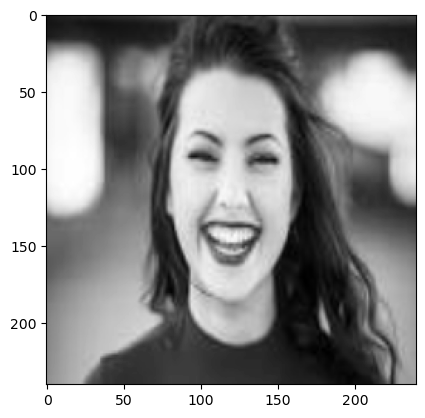

In [14]:
plt.imshow(X[3],cmap='gray')

In [15]:
#################################

from keras.models import load_model
from time import sleep

from tensorflow.keras.utils import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

In [16]:
classifier =load_model(r'C:\Users\armej\Desktop\PID\Emotion_Detection_CNN\model.h5')

emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

1/1 [==============================] - 0s 229ms/step


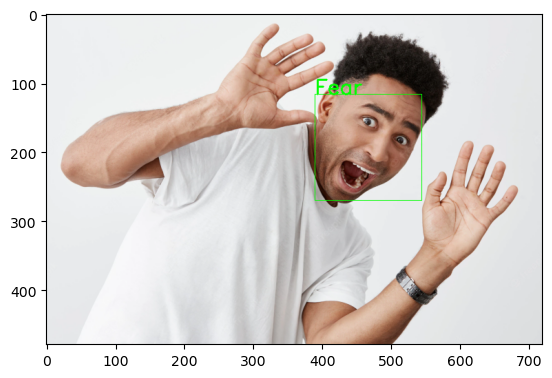

In [29]:
cap = cv2.imread(str(emotion_dict['Surprise'][3]))
classifier =load_model(r'C:\Users\armej\Desktop\PID\Emotion_Detection_CNN\model.h5')

face_detector = dlib.get_frontal_face_detector()
frame = cv2.imread(str(emotion_dict['Surprise'][0]))
frame = imutils.resize(frame, width=720)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
coordinates_bboxes = face_detector(gray, 1)
#print("coordinates_bboxes:", coordinates_bboxes)\
for c in coordinates_bboxes:
    x_ini, y_ini, x_fin, y_fin = c.left(), c.top(), c.right(), c.bottom()
    cv2.rectangle(frame, (x_ini, y_ini), (x_fin, y_fin), (0, 255, 0), 1)
    roi_gray = cv2.rectangle(gray, (x_ini, y_ini), (x_fin, y_fin), (0, 255, 0), 1)
    roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
    if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)
            prediction = classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position = (x_ini,y_ini)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)     
    
img2 = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
     


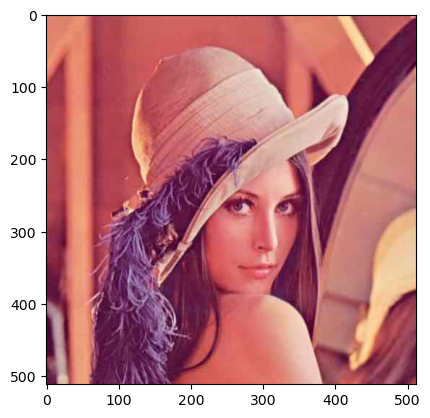

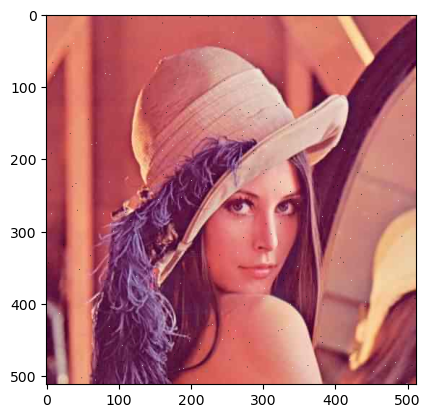

In [56]:
import random 
import cv2 
  
def add_noise(img):     
    row = img.shape[0]   
    col = img.shape[1]   
    number_of_pixels = random.randint(100,200) 
    for i in range(number_of_pixels):         
        
        y_coord=random.randint(0, row - 1)        
        x_coord=random.randint(0, col - 1)  
        img[y_coord][x_coord] = 255

    number_of_pixels = random.randint(100 , 200) 

    for i in range(number_of_pixels): 
        y_coord=random.randint(0, row - 1)        
        x_coord=random.randint(0, col - 1)         
        img[y_coord][x_coord] = 0
          
    return img 
  
img = cv2.imread('lena_rectangle.png') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show() 
img2 = add_noise(img)
#img2 = cv2.cvtColor(img2)
plt.imshow(img2)
plt.show()

